## III - Auto Insurance Industry

#### Aim of the Project 
      The  aim  of  the  project  is  to build  a  Machine  Learning Model to predict whether an owner will initiate an auto insurance claim in the next year.

In [59]:
# Importing Required Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import resample
import missingno as msno
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
import imblearn 
from imblearn import over_sampling 
from imblearn.over_sampling import SMOTE
from imblearn import FunctionSampler
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import LinearSVC
import xgboost
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

#### 1. Write at least 3 important inferences from the data above

In [60]:
data = pd.read_csv(r"C:\Users\Shivani Dussa\Downloads\all_projects\all_projects\dataset\train(1).csv")
data.shape

(595212, 59)

In [3]:
data.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [4]:
data.columns

Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

In [64]:
data.T.describe()

,0,1,2,3,4,5,6,7,8,9,...,595202,595203,595204,595205,595206,595207,595208,595209,595210,595211
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,...,5.900000e+01,5.900000e+01,5.900000e+01,5.900000e+01,5.900000e+01,5.900000e+01,5.900000e+01,5.900000e+01,5.900000e+01,5.900000e+01
mean,2.138612,2.159989,3.235961,3.584627,3.362504,3.994303,3.645838,2.821123,3.461320,4.064709,...,2.522302e+04,2.522347e+04,2.522246e+04,2.522273e+04,2.522268e+04,2.522298e+04,2.522362e+04,2.522276e+04,2.522435e+04,2.522291e+04
std,3.300804,3.755326,8.322764,13.668341,11.063726,13.782551,13.152822,5.506853,9.581766,13.992360,...,1.937209e+05,1.937213e+05,1.937219e+05,1.937220e+05,1.937222e+05,1.937225e+05,1.937228e+05,1.937230e+05,1.937234e+05,1.937243e+05
min,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,...,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.000000,1.000000,1.000000,0.900000,0.840759,1.000000,0.639683,1.000000,1.000000,1.000000,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.035056e-01,1.000000e+00,1.000000e+00,6.590713e-01,1.000000e+00,3.780212e-01
75%,2.000000,2.000000,2.658312,2.000000,2.000000,2.666324,2.000000,2.500000,3.000000,2.000000,...,2.000000e+00,2.500000e+00,2.500000e+00,3.000000e+00,2.000000e+00,1.822876e+00,3.000000e+00,2.000000e+00,3.000000e+00,2.500000e+00
max,12.000000,19.000000,60.000000,104.000000,82.000000,104.000000,99.000000,30.000000,68.000000,104.000000,...,1.488001e+06,1.488005e+06,1.488008e+06,1.488009e+06,1.488011e+06,1.488013e+06,1.488016e+06,1.488017e+06,1.488021e+06,1.488027e+06


- 1. In the above we can observe that there are **NO Nulls in the Data**
- 2. Data have 3 variables they are:
     Interval
     Binary
     Categorical
- 3. Most of the features are un correlated
- 4. In the postfix the bin indicates to binary features and cat indicates to categorical features rest of all are odinal         and continuous features

#### 2. Is the data balanced? Meaning are targets 0 and 1 in the right proportion? 

In [5]:
data.head(3)

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0


In [6]:
data['target'].value_counts()

0    573518
1     21694
Name: target, dtype: int64

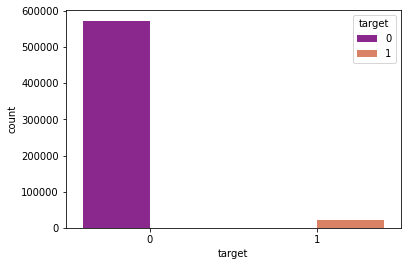

In [7]:
sns.countplot(x = 'target',hue = 'target',data = data, palette = 'plasma')
plt.show()

- **No, we can say by above information it is not balanced dataset. The given data is `Imbalanced`**

#### 3. How many categorical features are there? 

In [8]:
data.columns

Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],


In [9]:
data.dtypes

id                  int64
target              int64
ps_ind_01           int64
ps_ind_02_cat       int64
ps_ind_03           int64
ps_ind_04_cat       int64
ps_ind_05_cat       int64
ps_ind_06_bin       int64
ps_ind_07_bin       int64
ps_ind_08_bin       int64
ps_ind_09_bin       int64
ps_ind_10_bin       int64
ps_ind_11_bin       int64
ps_ind_12_bin       int64
ps_ind_13_bin       int64
ps_ind_14           int64
ps_ind_15           int64
ps_ind_16_bin       int64
ps_ind_17_bin       int64
ps_ind_18_bin       int64
ps_reg_01         float64
ps_reg_02         float64
ps_reg_03         float64
ps_car_01_cat       int64
ps_car_02_cat       int64
ps_car_03_cat       int64
ps_car_04_cat       int64
ps_car_05_cat       int64
ps_car_06_cat       int64
ps_car_07_cat       int64
ps_car_08_cat       int64
ps_car_09_cat       int64
ps_car_10_cat       int64
ps_car_11_cat       int64
ps_car_11           int64
ps_car_12         float64
ps_car_13         float64
ps_car_14         float64
ps_car_15   

In [89]:
categorical_features = []
for i in data.columns:
    if data[i].nunique() == 3:
        categorical_features.append(i)

In [91]:
print("Number of Category features:", len(categorical_features))

Number of Category features: 5


In [88]:
bin_col = []
cat_col = []
num_col = []
for i in data.columns:
    if data[i].nunique() == 2:
        bin_col.append(i)
    elif data[i].nunique() == 3:
        cat_col.append(i)
    else:
        num_col.append(i)

print(bin_col)
print('Number of Binary variables:',len(bin_col))
print('-'*100)
print(cat_col)
print('Number of categorical variables:',len(cat_col))
print('-'*100)
print(num_col)
print('Number of numeric variables:',len(num_col))

['target', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_car_02_cat', 'ps_car_08_cat', 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin']
Number of Binary variables: 20
----------------------------------------------------------------------------------------------------
['ps_ind_04_cat', 'ps_car_03_cat', 'ps_car_05_cat', 'ps_car_07_cat', 'ps_car_10_cat']
Number of categorical variables: 5
----------------------------------------------------------------------------------------------------
['id', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_05_cat', 'ps_ind_14', 'ps_ind_15', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_04_cat', 'ps_car_06_cat', 'ps_car_09_cat', 'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_0

#### 4. How many binary features are there? 

In [65]:
binary_features = []
for i in data.columns:
    if data[i].nunique() == 2:
        binary_features.append(i)
print(binary_features)

['target', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_car_02_cat', 'ps_car_08_cat', 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin']


In [66]:
print("Number of Binary features:",len(binary_features))

Number of Binary features: 20


#### 5. Write inferences from data on interval variables.

In [92]:
interval_col = []
for j in data.columns:
    if data[j].dtypes == float:
        interval_col.append(j)
        
print(interval_col)
print("Number of interval variables:",len(interval_col))

['ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03']
Number of interval variables: 10


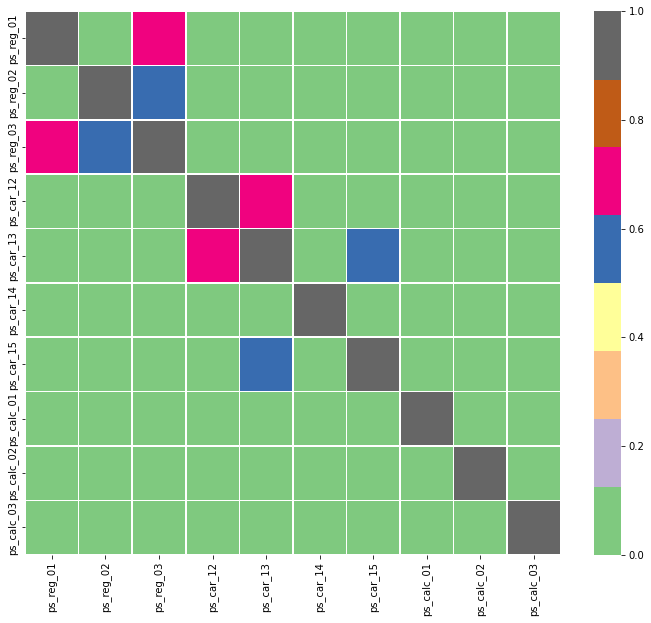

In [85]:
temp = data[interval_col].corr()
temp = temp[(temp>=0.5) | (temp<=-0.5)].fillna(0)
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(temp,linewidths=.5, cmap= "Accent",ax=ax)
plt.show()

#### Inference:
      By seeing above, we can say that there is almost all the features are independent only 3 features are correlated with co-relation near 0.5

#### 6. Write inferences from data on ordinal variables

In [20]:
data.head(4)

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0


In [100]:
ordinal ={}
for i in data[cat_col].columns:
    ordinal[i] = data[cat_col][i].nunique()

pd.DataFrame(ordinal,index=['unique values']).shape[1]

In [31]:
data[ordinal].describe()

C:\Users\Shivani Dussa\AppData\Local\Temp\ipykernel_2924\4236068891.py:1: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  data[ordinal].describe()


,ps_ind_02_cat,ps_ind_04_cat,ps_ind_05_cat,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,1.358943,0.416794,0.405188,8.295933,0.829948,-0.504899,0.725192,-0.157732,6.555340,0.910027,0.832080,1.328890,0.992136,62.215674
std,0.664594,0.493311,1.350642,2.508270,0.375679,0.788654,2.153463,0.844417,5.501445,0.347106,0.373796,0.978747,0.091619,33.012455
min,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,1.000000
25%,1.000000,0.000000,0.000000,7.000000,1.000000,-1.000000,0.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,32.000000
50%,1.000000,0.000000,0.000000,7.000000,1.000000,-1.000000,0.000000,0.000000,7.000000,1.000000,1.000000,2.000000,1.000000,65.000000
75%,2.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,11.000000,1.000000,1.000000,2.000000,1.000000,93.000000
max,4.000000,1.000000,6.000000,11.000000,1.000000,1.000000,9.000000,1.000000,17.000000,1.000000,1.000000,4.000000,2.000000,104.000000


In [41]:
data[ordinal].shape

C:\Users\Shivani Dussa\AppData\Local\Temp\ipykernel_2924\1423323322.py:1: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  data[ordinal].shape


(595212, 14)

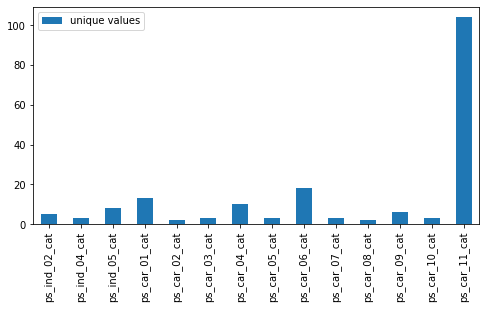

In [37]:
ordinal ={}
for i in data[cat_feature].columns:
    ordinal[i] = data[cat_feature][i].nunique()

pd.DataFrame(ordinal,index=['unique values']).T.plot.bar(figsize=(8,4));

##### Inference:
      we can observe from above data, there are almost features at near 20, but only one feature have near 90 unique values.

#### 7. Write inferences from data on binary variables.

In [63]:
data[binary_features].describe()

,target,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_car_02_cat,ps_car_08_cat,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.660823,0.121081,0.153446,0.829948,0.832080,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.473430,0.326222,0.360417,0.375679,0.373796,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


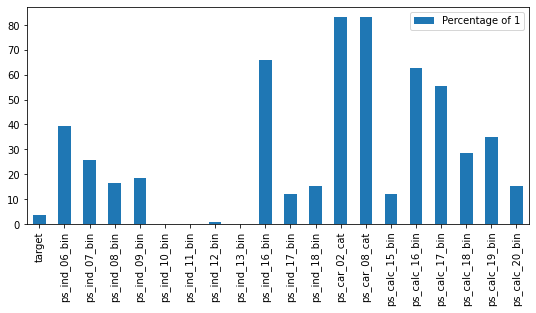

In [67]:
col = metadata_matrix_dataframe[metadata_matrix_dataframe['Unique_Values_Count'] == 2].index
df_1 = pd.DataFrame((data[col].sum()/data[col].shape[0])*100, columns=['Percentage of 1'])
df_1.plot.bar(figsize=(9,4));

##### Inference:
    - Here, we can obsereve above, target training data is 0.3645% it is clearly understanding its "Imbalnced data" and ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin are very low too near percentage of 1 . and ps_car_02_cat, ps_car_08_cat are high.

#### 8. Check if the target data is proportionate or not. Hint: Below than 30% for binary data is sign of imbalance  

In [68]:
data['target'].value_counts()

0    573518
1     21694
Name: target, dtype: int64

In [73]:
data['ps_ind_06_bin'].value_counts()

0    360852
1    234360
Name: ps_ind_06_bin, dtype: int64

In [69]:
data.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [82]:
data['target'].head(11)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     1
10    0
Name: target, dtype: int64

In [129]:
Auto_0 = data[data['target'] == 1]
Auto_1 = data[data['target'] == 0]
# converting to percentage
print(np.round(Auto_0.shape[0] * 100/ data.shape[0],2))
print(np.round(Auto_1.shape[0] * 100 / data.shape[0],2))

3.64
96.36


In [132]:
Auto_0 = np.round(Auto_0.shape[0] * 100/ data.shape[0],2)
Auto_1 = np.round(Auto_1.shape[0] * 100 / data.shape[0],2)

In [134]:
print('Target 0 shape:',data[data['target']==0].shape, Auto_0,'%','\nTarget 1 shape:',data[data['target']==1].shape,Per0,'%')

Target 0 shape: (573518, 59) 3.64 % 
Target 1 shape: (21694, 59) 96.36 %


<AxesSubplot:>

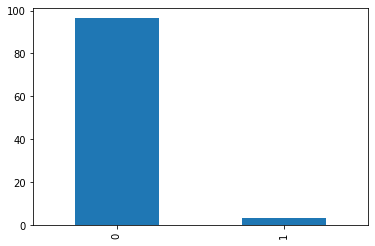

In [140]:
target = data['target'].value_counts() / data.shape[0]*100
target.plot.bar()

##### Inference:
   The Data shows that it is **Imbalnced** data

#### 9. What should be the preferred way in this case to balance the data? 

To get Balanced data we are approaching to make a balanced dataset out of an imbalanced that is **Sampling Methods** or 
**Re-Sampling Methods** in that we apply two methods Under-Sampling or Over-Sampling, Over-sampling can be used through SMOKE Technique as we sampling an existing data sample.

#### 10. How many training records are there after achieving a balance of 12%?

In [22]:
# using sample Technique
AutoInsurance_Target0 = data[data['target'] == 0]
AutoInsurance_Target1 = data[data['target'] == 1]
Data_Sampled = resample(AutoInsurance_Target1, replace = True, n_samples = int(len(AutoInsurance_Target0) * 0.12),
                        random_state = 42)
print("Training Records after achieving 12% of Blanced Data:", Data_Sampled.shape[0] + AutoInsurance_Target0.shape[0])

Training Records after achieving 12% of Blanced Data: 642340


In [23]:
Data_Sampled.shape

(68822, 59)

In [24]:
data.shape

(595212, 59)

In [25]:
##### After resampling the 12%

In [30]:
new_data = pd.concat([AutoInsurance_Target0,Data_Sampled])

<AxesSubplot:xlabel='target', ylabel='count'>

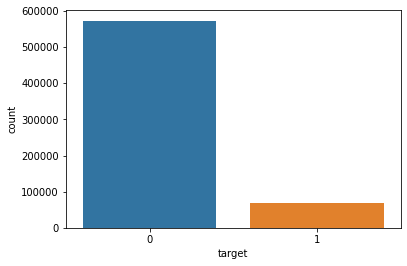

In [31]:
sns.countplot(x = new_data['target'])

- **There is an Improvement after resampling the 2% balanced data**

#### 11. Which are the top two features in terms of missing values? 

In [32]:
data.duplicated().sum()

0

<AxesSubplot:>

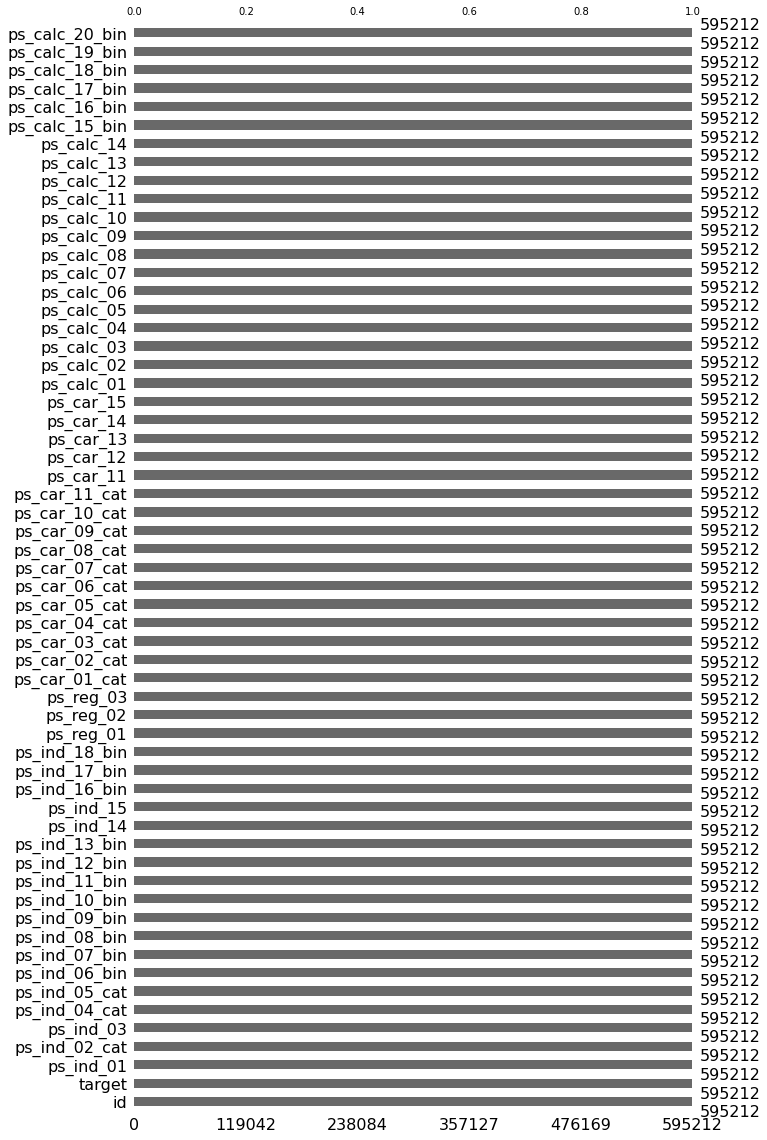

In [175]:
msno.bar(data, figsize = (10,20))

##### Inference:
     Here, there are no missing values present in the dataset

#### 12. In total,how many features have missing values? 

#### 13. What steps should be taken to handle the missing data?

#### 14. Which interval variables have strong correlation? 

In [28]:
corr_var = data[interval_feature].corr() 

In [34]:
corr_var

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_11,ps_car_12,ps_car_13,...,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
ps_ind_01,1.000000,0.223408,-0.024971,0.122137,0.102212,0.183855,0.139125,0.008252,0.161842,0.099752,...,-0.001171,0.000147,-0.000658,0.002993,-0.000085,-1.344982e-03,-0.001263,0.001521,0.000199,-0.000891
ps_ind_03,0.223408,1.000000,0.001990,0.170449,0.003209,0.048338,0.002348,-0.059358,0.088992,0.048308,...,-0.001245,0.002361,0.001533,0.001267,-0.001544,2.302873e-04,-0.002716,-0.002352,0.000133,0.000205
ps_ind_14,-0.024971,0.001990,1.000000,-0.121547,0.014093,0.009283,0.007607,0.004418,0.019637,0.022926,...,0.000205,-0.000242,0.001023,0.004077,-0.001443,1.975748e-03,-0.000243,0.000284,0.000307,-0.000387
ps_ind_15,0.122137,0.170449,-0.121547,1.000000,-0.051826,0.021702,0.001956,0.023000,-0.028002,-0.037885,...,0.000874,0.000033,0.001721,-0.001309,-0.000985,-1.278706e-03,-0.001952,-0.001263,-0.000922,0.001348
ps_reg_01,0.102212,0.003209,0.014093,-0.051826,1.000000,0.471027,0.637035,0.077168,0.018802,0.027097,...,-0.000782,-0.002517,0.000424,-0.002515,0.000104,-1.007123e-03,-0.000433,0.000968,-0.002920,-0.000177
ps_reg_02,0.183855,0.048338,0.009283,0.021702,0.471027,1.000000,0.516457,0.068159,0.171416,0.194316,...,-0.001460,0.000352,-0.000039,-0.000401,0.001110,1.899801e-04,0.000296,0.000925,-0.003353,-0.001903
ps_reg_03,0.139125,0.002348,0.007607,0.001956,0.637035,0.516457,1.000000,0.080386,0.082578,0.099415,...,-0.001292,-0.001865,-0.000465,-0.002728,0.000151,-1.384235e-04,-0.000347,0.001357,-0.002015,-0.000637
ps_car_11,0.008252,-0.059358,0.004418,0.023000,0.077168,0.068159,0.080386,1.000000,0.056829,0.101797,...,0.002459,-0.000251,-0.000330,-0.002458,-0.000510,-5.672563e-04,-0.001206,-0.001181,0.001133,0.000945
ps_car_12,0.161842,0.088992,0.019637,-0.028002,0.018802,0.171416,0.082578,0.056829,1.000000,0.671720,...,0.001598,0.000869,0.000484,-0.000119,0.000559,2.836209e-04,-0.001532,0.001454,0.000784,-0.000392
ps_car_13,0.099752,0.048308,0.022926,-0.037885,0.027097,0.194316,0.099415,0.101797,0.671720,1.000000,...,0.001105,0.002180,-0.000912,0.000263,0.001678,1.044148e-03,0.000415,0.000377,0.000583,-0.000574


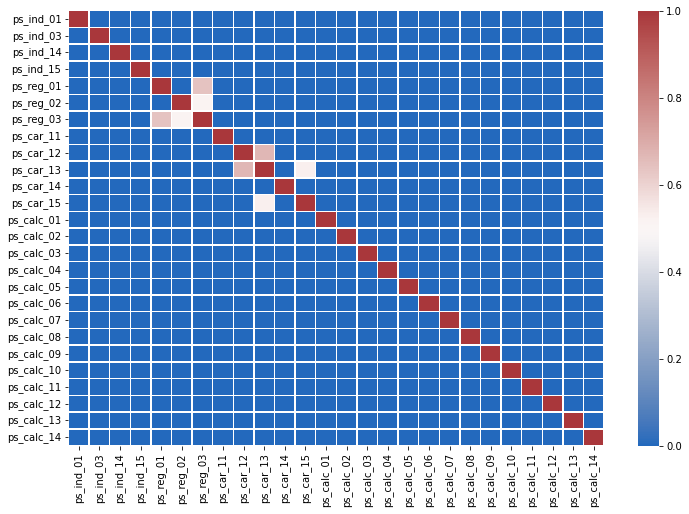

In [37]:
corr_var = corr_var[(corr_var>=0.5) | (corr_var<=-0.5)].fillna(0)
fig, ax = plt.subplots(figsize = (12,8))
sns.heatmap(corr_var,linewidths = .5, cmap = "vlag", ax = ax)
plt.show()

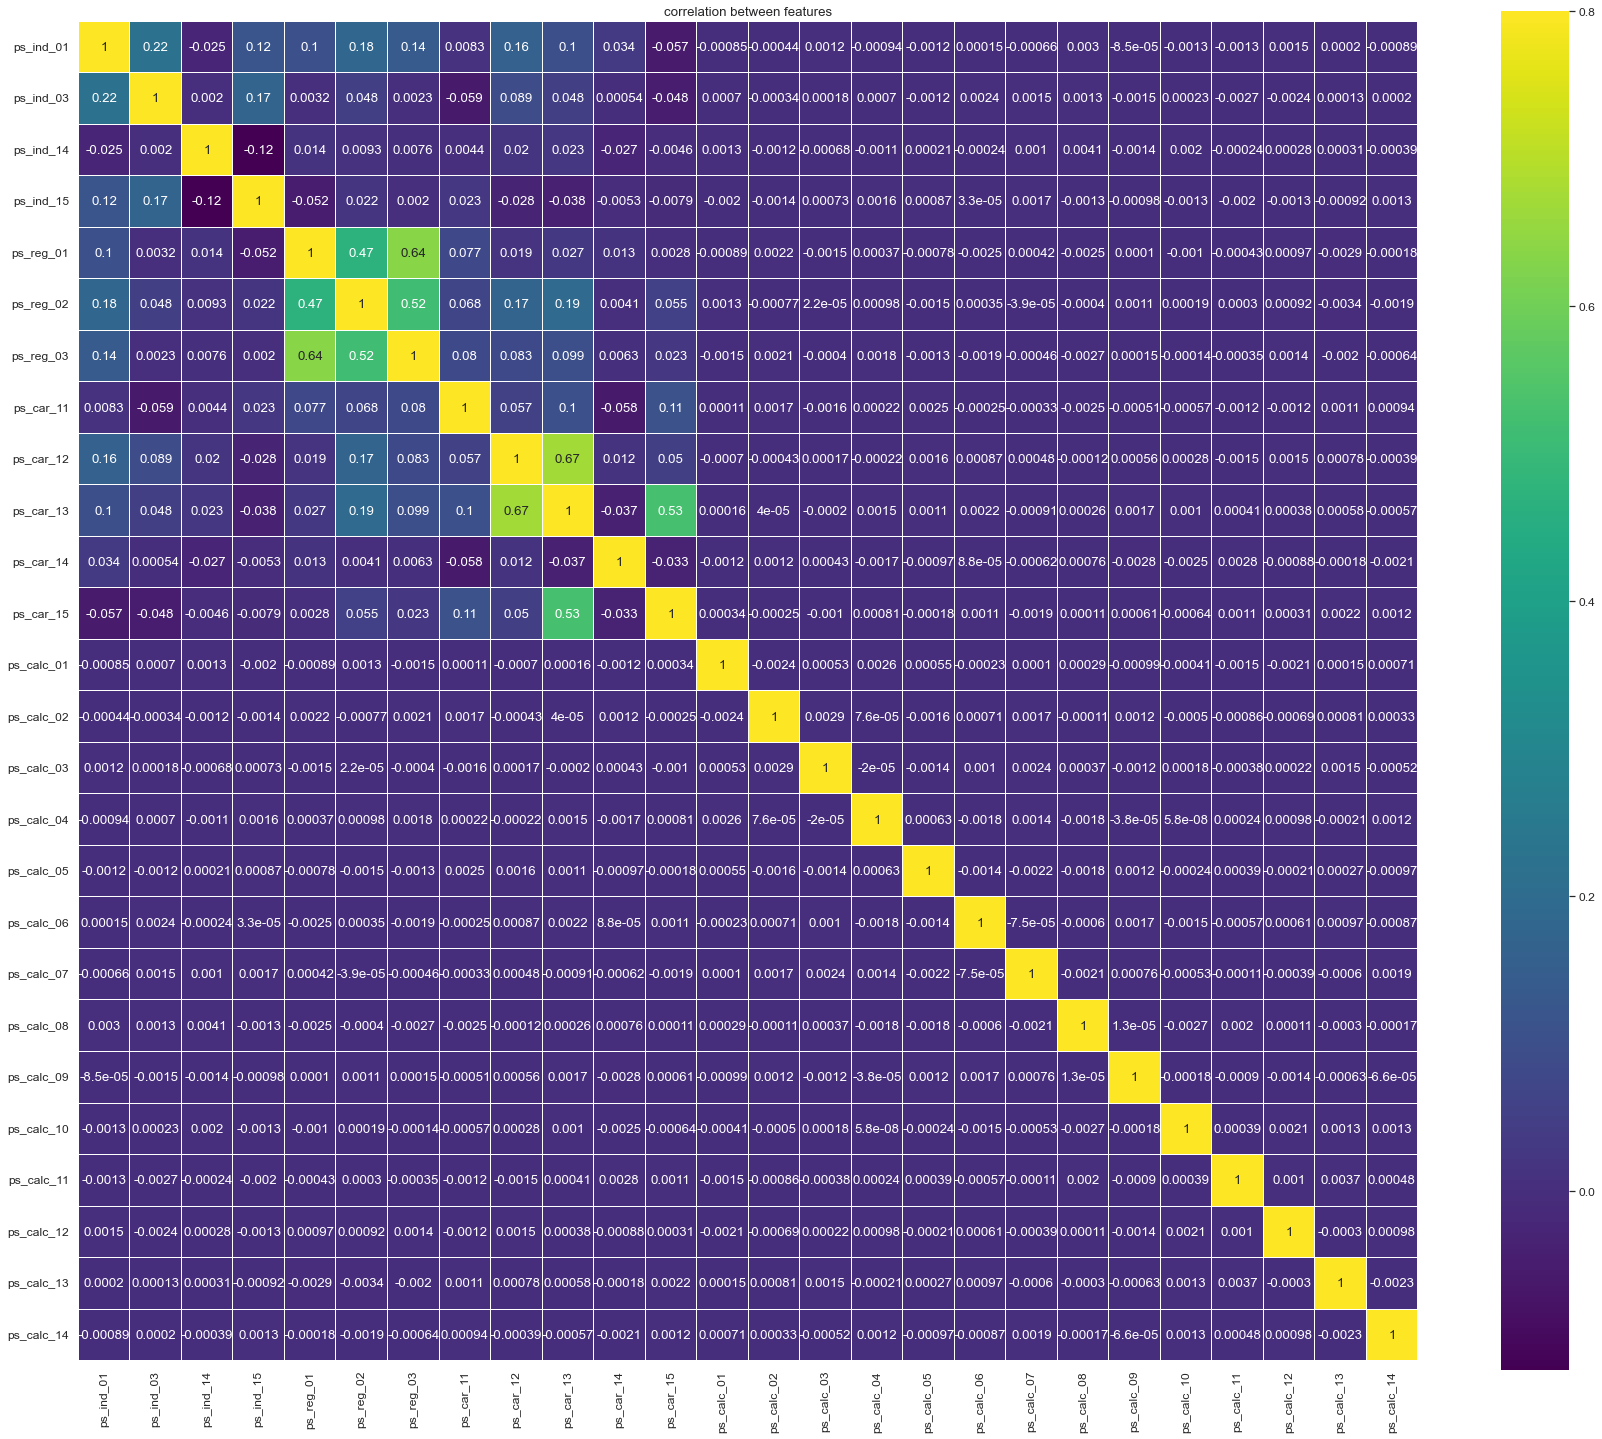

In [29]:
dfcorr = corr_var
sns.set(font_scale = 1.10)
plt.figure(figsize = (30,25))

sns.heatmap(dfcorr,vmax = .8, linewidth = 0.01, square = True, annot = True, cmap = 'viridis',linecolor = 'white')
plt.title("correlation between features");

##### Inference:
       Interval vraiables with High co-relation  are:
       ps_car_13 with ps_car_12 and ps_car_12 with ps_car_13 has strong correlation
       ps_reg_03 with ps_reg_01 and ps_reg_01 with ps_reg_03 has strong correlation

#### 15. What's the level of correlation among ordinal features? 

In [9]:
cat_corr = data[cat_feature].corr()

Text(0.5, 1.0, 'Leval of correlation among ordinal features')

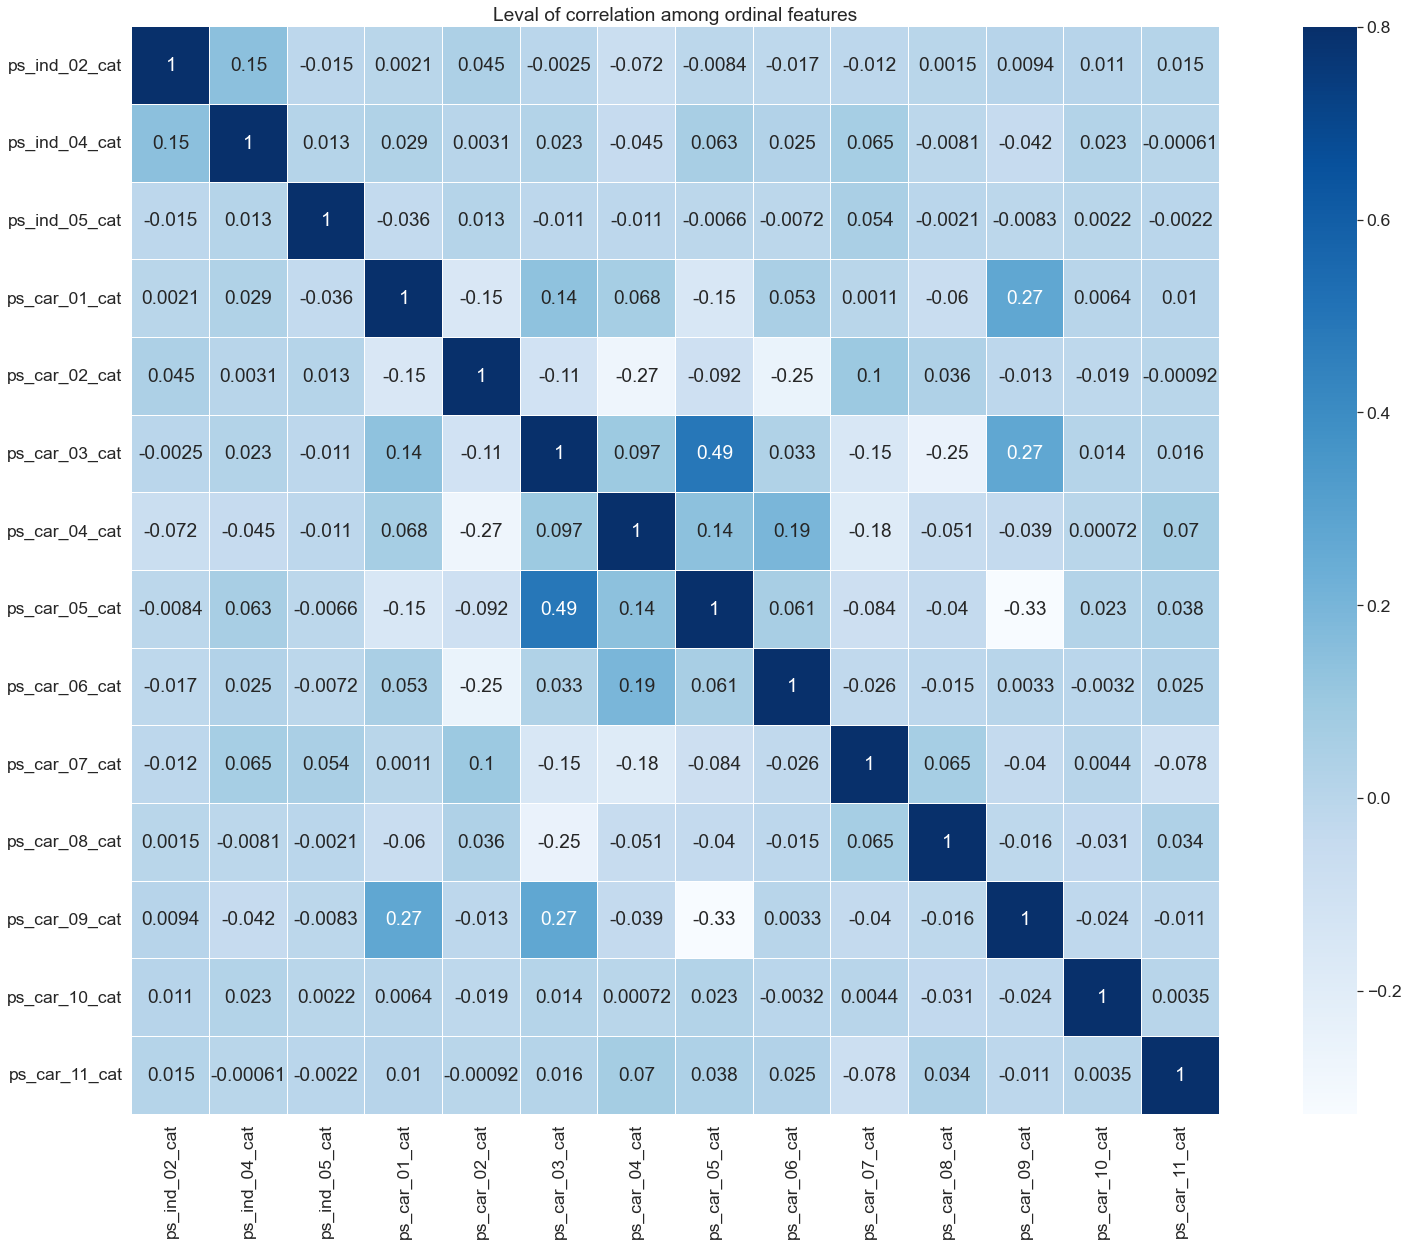

In [22]:
dfcat_corr = cat_corr
sns.set(font_scale = 1.59)
plt.figure(figsize = (30,20))

sns.heatmap(dfcat_corr, vmax = .8, linewidth = 0.01, square = True, annot = True, cmap = 'Blues', linecolor = 'white')
plt.title("Leval of correlation among ordinal features")

##### Inference:
    Ordinal Level with High correlation:
    ps_car_05_cat with ps_car_03_cat has high correlation the level of correlation is 0.49
    ps_car_06_cat with ps_car_04_cat has high correlation the level of correlation is 0.19 

#### 16. Implement Hot Encoding for categorical features

In [24]:
data.columns

Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],


#### 17. In nominal and interval features, which features are suitable for StandardScaler? 

In [ ]:
# standardscaler for interval features
clf = RandomForestClassifier()

In [32]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(_X,_y)

feature_imp = pd.Series(clf.feature_importances_,index=_X.columns).sort_values(ascending=False)
imp = pd.DataFrame(feature_imp).reset_index()
imp.columns = ["Features", 'Imp']

imp['Imp'] = (imp['Imp']/max(imp['Imp']))*100
col = imp[imp["Imp"]>25]['Features'].tolist()

In [42]:
print("Top 10 ordered important features")
print(imp[:10].Features);

Top 10 ordered important features
0        ps_car_13
1        ps_reg_03
2        ps_car_14
3       ps_calc_14
4       ps_calc_10
5       ps_calc_11
6    ps_car_11_cat
7        ps_ind_03
8        ps_ind_15
9       ps_calc_02
Name: Features, dtype: object


#### 18. Summarize the learnings of ED

1. The Data which was given is **Imbalanced** dataset:
    0 - 96.3%
    1 - 3.64% 
2. After balancing our data to 12% balanced data it increases according to that.
3. There are No Missing values in the dataset
4. There are Most features which are Uncorrelated
5. Top10 importnant features are:

   - 1. ps_car_13
   - 2. ps_reg_03
   - 3. ps_car_14
   - 4. ps_calc_14
   - 5. ps_calc_10
   - 6. ps_calc_11
   - 7. ps_car_11_cat
   - 8. ps_ind_03
   - 9. ps_ind_15
   - 10. ps_calc_02

## Modeling:

#### 1. The Simple Logistic Regression Model seems to have high accuracy. Is that what we need at all? What is the problem with this model? 

In [4]:
# splitting the data

In [3]:
data.head(2)

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0


In [4]:
X = data.drop(['target','id'], axis = 1)
y = data['target']

In [5]:
# spilitting to train test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [5]:
X_train.shape, X_test.shape

((476169, 57), (119043, 57))

In [6]:
y_train.shape, y_test.shape

((476169,), (119043,))

In [7]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [8]:
log_r = LogisticRegression();
log_r.fit(X_train,y_train);

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
y_pred = log_r.predict(X_test)

In [10]:
print("Accuracy Score:", metrics.accuracy_score(y_pred,y_test))

Accuracy Score: 0.9631645707853465


In [11]:
print("confusion Matrix:\n", confusion_matrix(y_pred, y_test))

confusion Matrix:
 [[114658   4385]
 [     0      0]]


#### 1. The Simple Logistic Regression Model seems to have high accuracy. Is that what we need at all? What is the problem with this model? 

#### 2. Why do you think f1-score is 0.0? 

In [41]:
#train_y_pred = log_r.predict(X_train)
#test_y_pred = log_r.predict(X_test)

In [40]:
#print("Train F1 score:\n", f1_score(train_y_pred, y_train))
#print("Test F1 score:\n", f1_score(test_y_pred, y_test))

In [13]:
print("F1 Score:\n", f1_score(y_pred, y_test))

F1 Score:
 0.0


 - **Yes, f1 is 0, beacuse "target" data  is not being balanced logistic regression is not being able to generalize effectively with the available data**

#### 3. What is the precision and recall score for the model?

In [11]:
print("Precision Score:", precision_score(y_pred, y_test))

Precision Score: 0.0


In [14]:
print("Recall Score:", recall_score(y_pred, y_test));

Recall Score: 0.0


C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- **Both *Precision score* and *Recall Score* are 0, beacuse the F1 score is 0 both precision and recall scores are also 0 and again this beacuase of target data is imbalanced**

#### 4. What is the most important inference you can draw from the result?

.

- **The most important inference that I can recognize is the given data is very *Imbalanced* in that target data is not balanced for that linear regression is our model not working as we expected when we are doing training. we should do improve our model by resampling** 

#### 5. What is the accuracy score and f1-score for the improved Logistic Regression model?

#### Improving our Model balancing the dataset with resampling Method
- **using `SMOTE` Technique**

In [22]:
import imblearn 
from imblearn import over_sampling 
from imblearn.over_sampling import SMOTE

In [23]:
sample = SMOTE(random_state = 27)

In [24]:
from imblearn import FunctionSampler

In [17]:
from collections import Counter
Counter(y_res)

Counter({0: 573518, 1: 21694})

In [25]:
def func(X, y):
    return X, y
sampler = FunctionSampler(func=func)
X_res, y_res = sampler.fit_resample(X, y)

In [26]:
np.all(X_res == X)

np.all(y_res == y)

True

In [27]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
def func(X, y, sampling_strategy, random_state):
    return RandomOverSampler(sampling_strategy=sampling_strategy,random_state=random_state).fit_resample(X, y)
sampler = FunctionSampler(func=func,kw_args={'sampling_strategy': 'auto', 'random_state': 0})
X_res, y_res = sampler.fit_resample(X, y)
print(f'Resampled dataset shape {sorted(Counter(y_res).items())}')

Resampled dataset shape [(0, 573518), (1, 573518)]


In [28]:
from collections import Counter
Counter(y_res)

Counter({0: 573518, 1: 573518})

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((917628, 57), (917628,), (229408, 57), (229408,))

#### Standard Scaling 

In [30]:
from sklearn.preprocessing import StandardScaler
scaling = StandardScaler()
scaling.fit(X_train)

X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)

In [18]:
# After Resampling Logistic regression is applying
log_r1 = LogisticRegression()
log_r1.fit(X_train,y_train)

LogisticRegression()

In [19]:
y_pred1 = log_r1.predict(X_test)

In [20]:
Accuracy_Score = print("Accuracy Score:", accuracy_score(y_pred1, y_test))

Accuracy Score: 0.5884711954247455


In [21]:
print("F1 Score:", f1_score(y_pred1, y_test))
print("Precision Score:", precision_score(y_pred1, y_test))
print("Recall Score:", recall_score(y_pred1, y_test))

F1 Score: 0.572408170659903
Precision Score: 0.5519202047286733
Recall Score: 0.5944758553863232


- **Accuracy Score is 0.58**

- **F1 Score is 0.57**
- Yes after resampling the data with SMOTE Technique F1 score has improved 

#### 6. Why do you think f1-score has improved? 

- Before resampling the f1 score is 0 after resampling the data, "the f1 score had improved becuase before the data is imbalnced data" and target data is also **imbalaced target data** so thats why accuracy got hugher value and f1 score got 0 after resampling with **SMOTE** technique f1 score got **0.57**

#### 7. For model Linear SVC play with parameters – dual, max_iter and see if there is any improvement 

In [35]:
from sklearn import svm
from sklearn.svm import LinearSVC

In [23]:
l_svc = svm.LinearSVC(dual = True, max_iter = 100)

In [24]:
l_svc.fit(X_train,y_train)

C:\Anaconda\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(max_iter=100)

In [25]:
X_train.shape, y_train.shape, X_test.shape

((917628, 57), (917628,), (229408, 57))

In [27]:
# predicting on the test data
y_pred = l_svc.predict(X_test)

In [28]:
print("Accuracy Score:", accuracy_score(y_pred, y_test))

Accuracy Score: 0.5623474333937788


In [33]:
print("F1 Score:", f1_score(y_pred, y_test))
print("Precision Score:", precision_score(y_pred,y_test))
print("Recall Score:", recall_score(y_pred,y_test))

F1 Score: 0.531009580575395
Precision Score: 0.49644083044378257
Recall Score: 0.5707529170766975


Yes, there is a change in **Accuracy**,**f1 score**, **precision score** and **recall score** after applying "Linear SVC" with different parameters, Accuracy is 0.56, f1 score is 0.53, precision score is 0.49 and recall score is 0.57. All values are 2% low compare to Logistic Regression Model. 
- Differnces shown below:

In [37]:
print("For Logistic Regression: ")
print("F1 Score:", f1_score(y_pred1, y_test))
print("Precision Score:", precision_score(y_pred1, y_test))
print("Recall Score:", recall_score(y_pred1, y_test))

For Logistic Regression: 
F1 Score: 0.572408170659903
Precision Score: 0.5519202047286733
Recall Score: 0.5944758553863232


In [38]:
print("After Applying LinearSVC: ")
print("F1 Score:", f1_score(y_pred, y_test))
print("Precision Score:", precision_score(y_pred,y_test))
print("Recall Score:", recall_score(y_pred,y_test))

After Applying LinearSVC: 
F1 Score: 0.531009580575395
Precision Score: 0.49644083044378257
Recall Score: 0.5707529170766975


#### 8. SVC with Imbalance Check & Feature Optimization & only 100K Records → is there improvement in scores? 

In [43]:
data.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [44]:
X = data.drop(['target','id'], axis = 1)
y = data['target']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [47]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((476169, 57), (119043, 57), (476169,), (119043,))

In [50]:
feature_imp = pd.Series(clf.feature_importances_,index= X.columns).sort_values(ascending=False)
imp = pd.DataFrame(feature_imp).reset_index()
imp.columns = ["Features", 'Imp']

imp['Imp'] = (imp['Imp']/max(imp['Imp']))*100
col = imp[imp["Imp"]>25]['Features'].tolist()

In [51]:
print("Top 10 ordered important features")
print(imp[:10].Features);

Top 10 ordered important features
0        ps_car_13
1        ps_reg_03
2        ps_car_14
3       ps_calc_10
4       ps_calc_14
5       ps_calc_11
6        ps_ind_15
7    ps_car_11_cat
8        ps_ind_03
9       ps_calc_02
Name: Features, dtype: object


In [15]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
clf.fit(X_train,y_train)

C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=5, max_features='auto', min_samples_leaf=52,
                       min_samples_split=120, n_jobs=-1, random_state=25)

In [16]:
y_predR = clf.predict(X_test)

In [ ]:
print("Confusion Matrix:", confusion_matrix(y_test, y_pred))

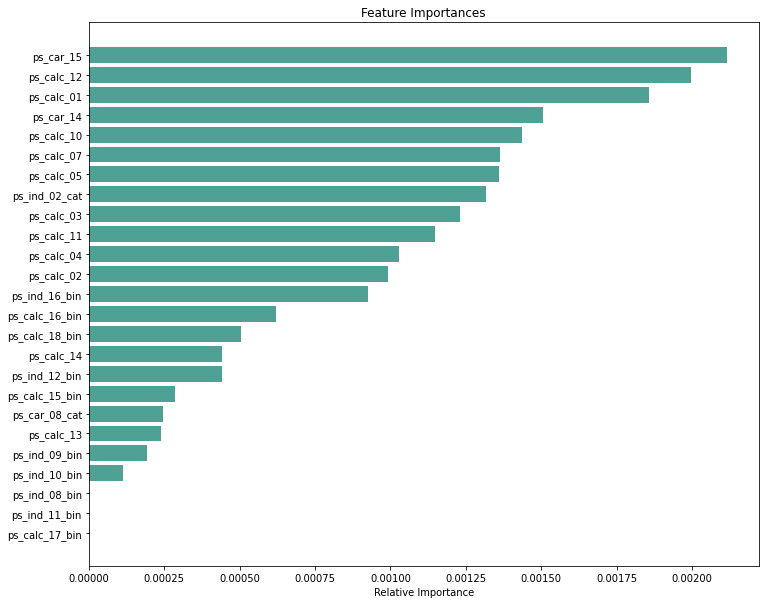

In [22]:
features = data.columns
importances = clf.feature_importances_
indices = np.argsort(importances)[:25]
plt.figure(figsize = (12,10))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color = '#4FA095', align = 'center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [25]:
features = data[['ps_car_15','ps_calc_12','ps_calc_01','ps_car_14','ps_calc_10','ps_calc_07','ps_calc_05','ps_ind_02_cat','ps_calc_03','ps_calc_11','ps_calc_04','ps_calc_02','ps_ind_16_bin','ps_calc_16_bin','ps_calc_18_bin','ps_calc_14','ps_ind_12_bin','ps_calc_15_bin','ps_car_08_cat','ps_calc_13','ps_ind_09_bin','ps_ind_10_bin','ps_ind_08_bin','ps_ind_11_bin','ps_calc_17_bin']]

In [32]:
X1 = features
y1 = data['target']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

In [34]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((476169, 25), (119043, 25), (476169,), (119043,))

In [42]:
L_svc = svm.LinearSVC(dual = True, max_iter = 100)

In [44]:
L_svc = svm.LinearSVC(dual = True, max_iter = 100)

In [45]:
L_svc.fit(X_train,y_train)

C:\Anaconda\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(max_iter=100)

In [46]:
y_pred = L_svc.predict(X_test)

In [47]:
print("Accuracy Score:", accuracy_score(y_pred, y_test))

Accuracy Score: 0.9631645707853465


Yes, There is an improvement in LinearSVC while changing in paramaters (dual and max_iter) actually LinearSVC model has peroformed very well acuuracy is very high. 

#### 9. XGBoost is one the better classifiers -- but still f1-score is very low. What could be the reason? 

In [14]:
import xgboost

In [15]:
from xgboost import XGBClassifier

In [31]:
#from sklearn.ensemble import 
XG_boost = XGBClassifier(objective = 'binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 50, 
                         alpha = 10,n_estimators = 100)
XG_boost.fit(X_train,y_train)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=50, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=10, ...)

In [33]:
y_pred = XG_boost.predict(X_test)

In [34]:
print("Accuracy Score:", accuracy_score(y_pred, y_test))

Accuracy Score: 0.9991020365462407


In [35]:
print("F1 Score:", f1_score(y_pred, y_test))

F1 Score: 0.9991011902684213


- Yes, in some cases f1 Score is very low still the XG Boost Model is one of the great classifiers "becuase XG Boost perfoms well on **False Negitives** and **False Positives** it cannot do the error control But, XG Boost gives best result through it on selection of the feature importances".
- **But in my model f1 score and Accuracy near to 1. f1 is slightly low comparing to f1 score that means my model is best fitted model.**

#### 10. What is the increase in number of features after one-hot encoding of the data? 

- Generally, we do One-Hot Encoding for categorical features, convert into numerical, in that categorical values in each column it has number of **unique values** in each column so it creates how many unique values we have in that categorical column it creates the each columns seperately so, **it will add a features**.

#### 11. Is there any improvement in scores after encoding? 

- There is no need of doing in encoding becuase it is done no categorical values present in the given dataset. "Generally there is **a lot of improvement in Accuracy scores and in our model improvement after doing encoding**".

#### 12. If not missing a positive sample is the priority which model is best so far? 

In [38]:
print("Confusion MAtrix:\n", confusion_matrix(y_pred, y_test))

Confusion MAtrix:
 [[114709      0]
 [   206 114493]]


- **If you see above XGBoost Classifier done a great job. count of missing  positive samples is 0.** 

#### 13. If not marking negative sample as positive is top priority, which model is best so far? 

In [40]:
print("Confusion Matrix:\n", confusion_matrix(y_pred, y_test))

Confusion Matrix:
 [[114709      0]
 [   206 114493]]


- **If you see above there are only 206 negitive samples. Again XGBoost Classifier is the best fit Model.**

#### 14. Do you think using AdaBoost can give any significant improvement over XGBoost?

In [41]:
from sklearn.ensemble import AdaBoostClassifier
Ada_Boost = AdaBoostClassifier(n_estimators = 100, random_state = 42)
Ada_Boost.fit(X_train, y_train)

Accuracy Score: 0.9991020365462407


In [48]:
y_pred_Adam = Ada_Boost.predict(X_test)

In [45]:
print("Accuracy Score:", accuracy_score(y_pred_Adam, y_test))

Accuracy Score: 0.59846212860929


In [47]:
print("F1 Score:", f1_score(y_pred_Adam, y_test))
print("Precision Score:", precision_score(y_test, y_pred_Adam))

F1 Score: 0.5896471846044192
Precision Score: 0.6017256584869121


In [49]:
print("Adam Confusion Matrix:", confusion_matrix(y_pred_Adam, y_test))

Adam Confusion Matrix: [[71110 48311]
 [43805 66182]]


- No, there is no significance improvement over XGBoost Classifier, AdamBoost is not performing well XGBoost is the best performer to my model. **There is much better results in Accuracy and F1 Score compare to AdaBoost Classifier.**

#### 15. MLPClassifier is the neural network we are trying. But how to choose the right no. of layers and size?

In [50]:
from sklearn.neural_network import MLPClassifier

In [51]:
MLP = MLPClassifier(hidden_layer_sizes= (10,10,10), activation = 'logistic', max_iter = 100)

In [52]:
MLP.fit(X_train,y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(10, 10, 10),
              max_iter=100)

In [53]:
y_pred_mlp = MLP.predict(X_test)

In [54]:
print("Accurcy Score:", accuracy_score(y_pred_mlp, y_test))

Accurcy Score: 0.6074504812386665


In [55]:
print("F1 Score:", f1_score(y_pred_mlp, y_test))

F1 Score: 0.6097233297507193


 MLP is not performing well than the XGBoost Classifier and
- As per Layers in Artificial Neural Networks ANN, to address a specific real-world predictive modeling problem but we cannot analytically calculate the number of layers or number of nodes. 
- But there are many methods to for determining the correct number of the neurons to use in the hidden layers, They are:
 1. The number of hidden neurons should be between the size of the input layers and size of the output layers 
 2. The number of hidden neurons should be  2/3 the size of the input layer and size of the output layers
 3. The number of hidden neurons should be less than twice the size of the layer.

#### 16. At what layer size we get the best f1-score?

- At size 10,10,10 the f1 score got 60% 

## Final Inference - Conclusion

In [106]:
from prettytable import PrettyTable
final_conculsion_table = PrettyTable()
final_conculsion_table.field_names = ['Model', 'Accuracy Score','f1 Score']
final_conculsion_table.add_row(['Logistic Regression(Imbalanced)', '96','0'])
final_conculsion_table.add_row(['Logistic Regression(Balanced)', '0.58','0.57'])
final_conculsion_table.add_row(['LinearSVC (Imbalanced)','0.56','0.53'])
final_conculsion_table.add_row(['SVC(changing Parameters)','0.96','0.95'])
final_conculsion_table.add_row(['XGBoost Classifier','0.99','0.99'])
final_conculsion_table.add_row(['Ada Boost Classifier', '0.59','0.58'])
final_conculsion_table.add_row(['MLP Classifier','0.60','0.60'])
print(final_conculsion_table)

+---------------------------------+----------------+----------+
|              Model              | Accuracy Score | f1 Score |
+---------------------------------+----------------+----------+
| Logistic Regression(Imbalanced) |       96       |    0     |
|  Logistic Regression(Balanced)  |      0.58      |   0.57   |
|      LinearSVC (Imbalanced)     |      0.56      |   0.53   |
|     SVC(changing Parameters)    |      0.96      |   0.95   |
|        XGBoost Classifier       |      0.99      |   0.99   |
|       Ada Boost Classifier      |      0.59      |   0.58   |
|          MLP Classifier         |      0.60      |   0.60   |
+---------------------------------+----------------+----------+


#### Conclusion:
   - F1 Score and Accuracy Scores of all used Machine Learning Models, comparing that **XG Boost Classifier** model given best performing and giving best result comparing to all other models.

   # Thank You